# Recap - The Cars Dataset

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset

👇 Run the code down below to import the [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) - _this version is slightly different from the one in the challenge 3._

In [19]:
aws_url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Note: It is a common practice to store csv online. This one is stored on the AWS account of LeWagon

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 cars x 8 features

(205, 8)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

❓ **Question (Information)** ❓ Collect some basic information about your dataset.

In [24]:
cars['cylindernumber'] = cars['cylindernumber'].map({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12})

In [9]:
cars['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    int64  
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 12.9+ KB


# (1) 🛠 Data preparation

## (1.0) Pre-requisites

❓ **Question (Potential anomalies)** ❓ 

- Are there columns which need to be modified because of their data types? 
    - Please proceed accordingly.

In [ ]:
# YOUR CODE HERE

## (1.1) Duplicates

❓ **Question (Duplicated rows)** ❓ 

Compute the number of duplicated rows that the cars dataset has.

In [22]:
cars.duplicated().sum()

0

In [21]:
cars.drop_duplicates(inplace=True).reset_index()

❓ **Question (Remove duplicates)** ❓ 

In [ ]:
# YOUR CODE HERE

## (1.2) Missing data

❓ **Question (`NaN`)** ❓ 

What is the percentage of `NaN` for each feature?

In [20]:
cars.isnull().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

<details>
    <summary><i>Answer</i></summary>
    
😇 It is a miracle but we do not have missing values here. You can move to the next section of this notebook :) 
    
</details>

## (1.3) Defining the features $X$ and the target $y$

❓ **Question** ❓

- Store the features of this dataset in a variable $X$
- Store the target in a variable $y$.

In [25]:
cars.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
5,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive


In [26]:
X = cars.drop(columns=['price'])
y = cars['price']

❓ **Question (Quick look at the target)** ❓ What is the proportion of "cheap" cars vs. "expensive" cars ? 

In [34]:
# YOUR CODE HERE
(y == 'expensive').sum() / ((y == 'expensive').sum() + (y == 'cheap').sum())

0.612565445026178

In [35]:
(y == 'cheap').sum() / ((y == 'expensive').sum() + (y == 'cheap').sum())

0.387434554973822

## (1.4) Scaling numerical features

❓ **Question (quick glance at the numerical columns)** ❓

- Show the boxplots of all the numerical columns in one line of code
- Do the same with their distributions using histograms

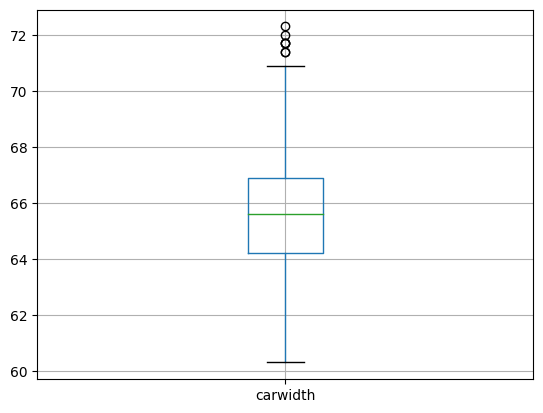

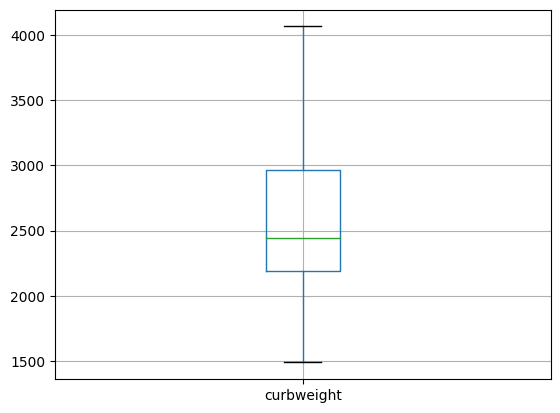

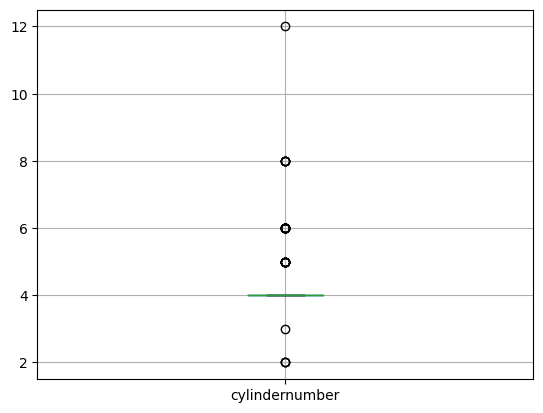

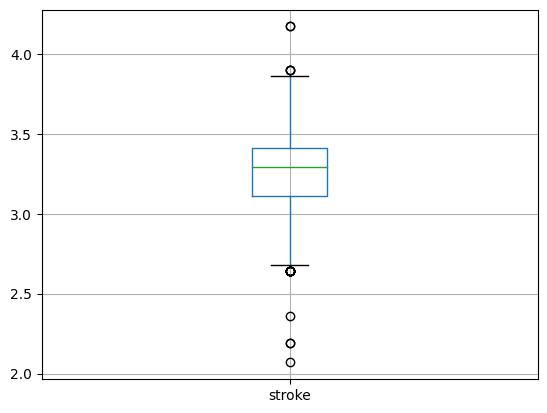

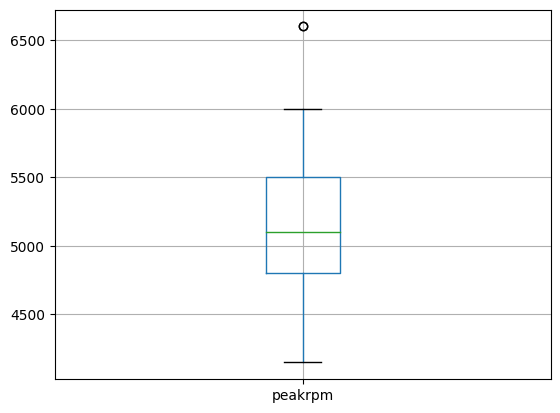

In [45]:
for c in cars.select_dtypes(include='number').columns:
    cars[[c]].boxplot()
    plt.show()

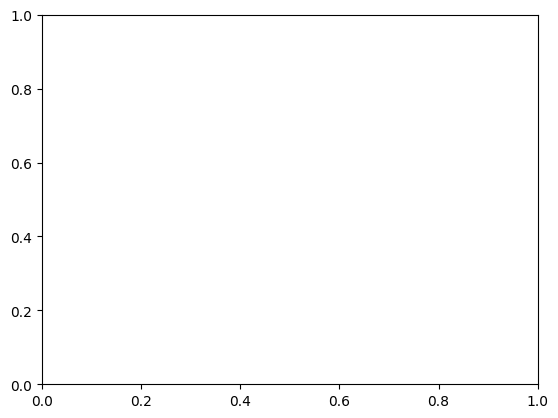

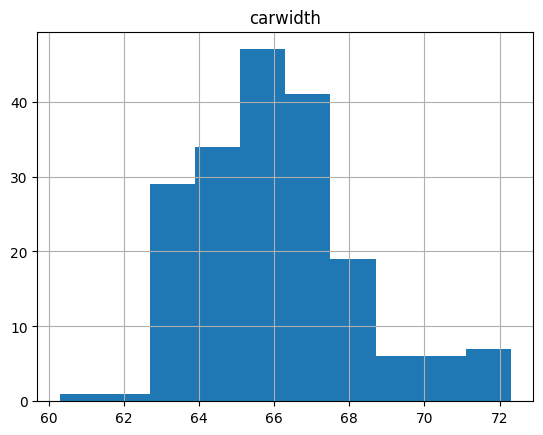

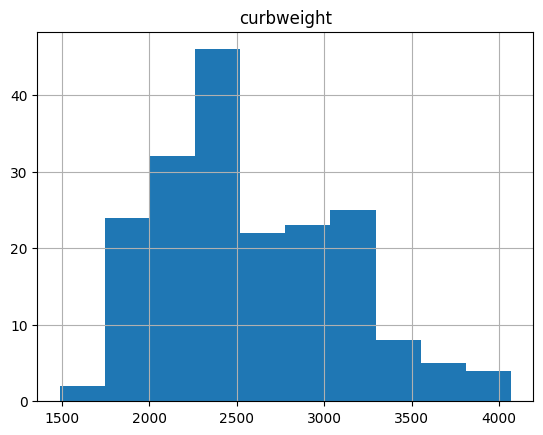

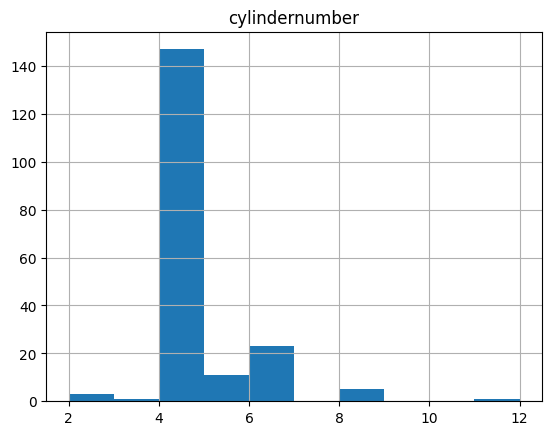

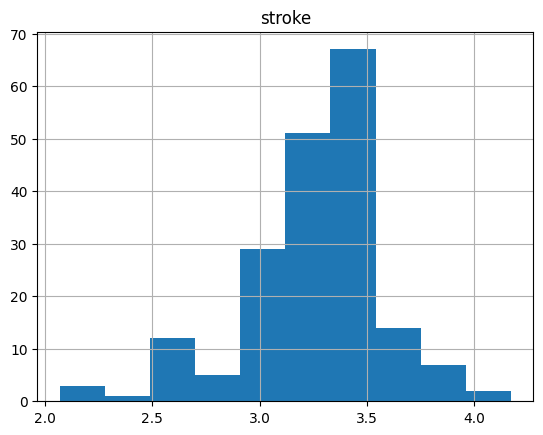

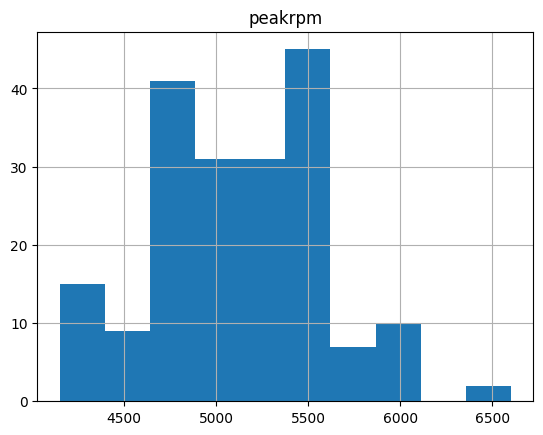

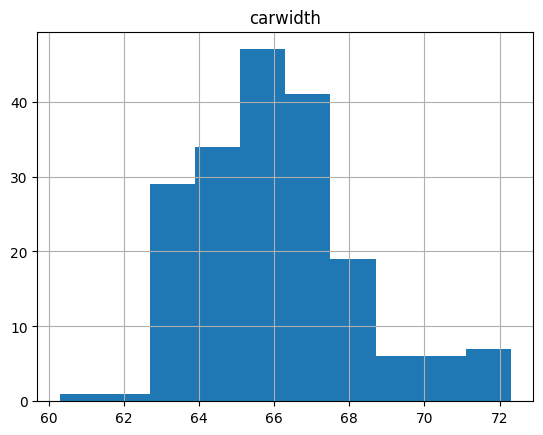

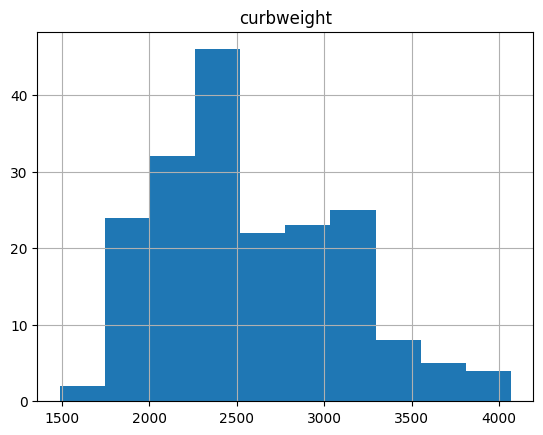

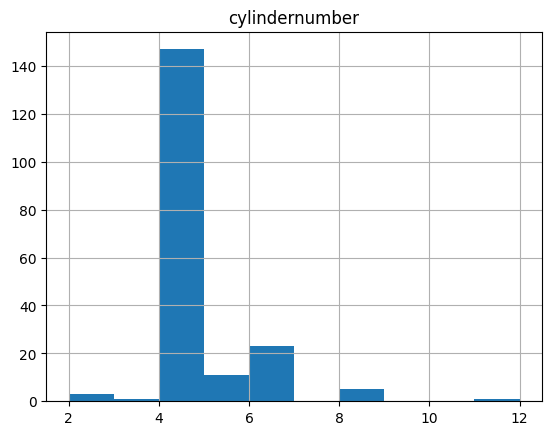

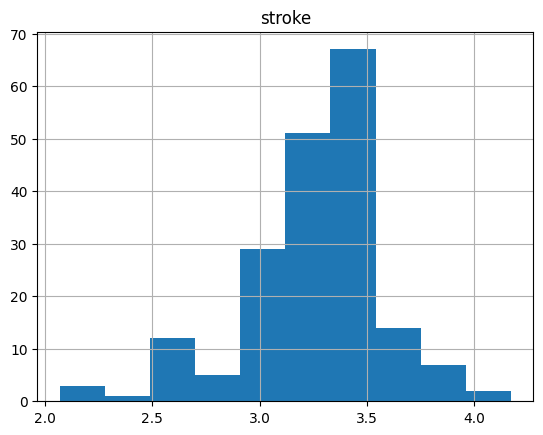

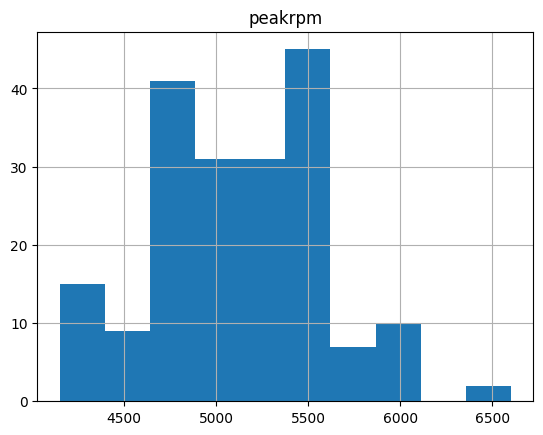

In [50]:
# from statsmodels.graphics.gofplots import qqplot
for c in cars.select_dtypes(include='number').columns:
#     sns.histplot(cars[c],line='s')
    cars[[c]].hist()
    plt.show()

❓ **Question (Focus on the numerical columns)** ❓

Store the numerical columns of the cars dataset into `cars_num`.

In [51]:
###########################
# Manual solution         # - not very smart
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# That is one way to select the numerical features...
# But not very smart...

###########################
# Elegant solution        # - much better
###########################

cars_num = X.select_dtypes(exclude = ['object']) # selecting only the numerical features
cars_num

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,64.10000,2548.0,4,2.68,5000.0
2,65.50000,2823.0,6,3.47,5000.0
3,65.88794,2337.0,4,3.40,5500.0
4,66.40000,2824.0,5,3.40,5500.0
5,66.30000,2507.0,5,3.40,5500.0
...,...,...,...,...,...
200,68.90000,2952.0,4,3.15,5400.0
201,68.80000,3049.0,4,3.15,5300.0
202,68.90000,3012.0,6,2.87,5500.0
203,68.90000,3217.0,6,3.40,4800.0


❓ **Question (Robust Scaler)** ❓

👨🏻‍🏫 Robust Scaling all the numerical features is a quick and efficient way of scaling.

In [183]:
cars

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
5,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...
200,std,68.90000,2952.0,ohc,4,3.15,5400.0,expensive
201,turbo,68.80000,3049.0,ohc,4,3.15,5300.0,expensive
202,std,68.90000,3012.0,ohcv,6,2.87,5500.0,expensive
203,turbo,68.90000,3217.0,ohc,6,3.40,4800.0,expensive


In [165]:
# Instantiating a RobustScaler
robust_scaler = RobustScaler()

# Creating a copy of the original numerical features 
cars_num_scaled = cars_num.copy()

# Scaling the features and storing them in the copy
cars_num_scaled = pd.DataFrame(robust_scaler.fit_transform(cars_num_scaled),
                               columns = cars_num.columns)

# Showing the scaled features
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


## (1.5) Encoding categorical features

❓ **Question (Focus on the categorical columns)** ❓

Store the categorical columns of the cars dataset into `cars_categorical`.

In [80]:
# Manual solution --> not very smart

# categorical_features = ["aspiration", "enginetype"]
# cars_categorical = X[categorical_features]

# Elegant solution --> much better
cars_categorical = X.select_dtypes(include = ['object']) # selecting only the categorical features
cars_categorical

,aspiration,enginetype
0,std,dohc
2,std,ohcv
3,std,ohc
4,std,ohc
5,std,ohc
...,...,...
200,std,ohc
201,turbo,ohc
202,std,ohcv
203,turbo,ohc


In [148]:
X.shape

(191, 15)

❓ **Question: What is the expected number of columns generated if we encode the categorical features** ❓

In [56]:
cars['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [57]:
cars['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

❓ **Question (OneHotEncoder): Encode the categorical features** ❓

<details>
    <summary><i>Hints</i></summary>
    
- Drop a column when a categorical feature is binary
- Use full matrixes (Sklearn estimators don't understand sparse matrixes)
- Store them into a Pandas DataFrame called `encoded_features`
    - 💡 Once that the OHE is fitted to a DataFrame, the new columns' names are accessible through _`get_features_names_out()`_
    
</details>

In [81]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False, drop="if_binary") 
# ohe.fit()
ohe.fit(X[['aspiration', 'enginetype']]) 

cars_categorical[ohe.get_feature_names_out()] = ohe.transform(X[['aspiration', 'enginetype']])

In [84]:
cars_categorical.drop(columns=['aspiration', 'enginetype'], inplace=True)

In [85]:
cars_categorical

,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
ohe.transform(X[['aspiration', 'enginetype']]).shape

(191, 8)

## (1.6) Concatenating all the preprocessed features together $X_{preprocessed}$

❓ **Question (aggregating all the preprocessed features together)** ❓

Concatenate `cars_num_scaled` and `cars_categorical` into `X_preprocessed`

In [87]:
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


In [91]:
cars_categorical

,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
X_preprocessed = cars_num_scaled.join(cars_categorical)

In [118]:
X_preprocessed['price'] = y

In [180]:
X_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-0.555556,0.135659,0.0,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.106644,-0.136951,0.0,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.296296,0.492248,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.259259,0.082687,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2.148148,0.518088,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.185185,0.782946,0.0,-0.466667,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,1.222222,0.735142,2.0,-1.400000,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
189,1.222222,1.000000,2.0,0.366667,-0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [120]:
X_preprocessed.dropna(inplace=True)

In [122]:
X_preprocessed.shape

(177, 14)

## (1.7) Encoding the target

❓ **Question (Encoding the categorical target)** ❓

Encode the target using 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [109]:
cars['price'].value_counts()

expensive    117
cheap         74
Name: price, dtype: int64

In [126]:
y = X_preprocessed['price']

In [128]:
X_preprocessed.drop(columns=['price'], inplace=True)

In [129]:
X_preprocessed.head()

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-0.555556,0.135659,0.0,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.106644,-0.136951,0.0,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.296296,0.492248,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.259259,0.082687,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2.148148,0.518088,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [127]:
y

0      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
186    0.0
187    1.0
188    1.0
189    1.0
190    1.0
Name: price, Length: 177, dtype: float64

# (2) 🏋🏻‍♂️ Modeling (Logistic Regression)

🎯 Our goal is to predict whether a car will be expensive or cheap based on some features.

## (2.0) Cross-Validation

👩‍🏫 In Machine Learning, when you want to compare different models, a Cross Validation is a robust method to roughly assess the performance of each individual submodel.

❓ **Question (CrossValidation)** ❓

What is the potential performance of a LogisticRegression for this dataset?

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression()
cv_results = cross_validate(model, X_preprocessed, y, cv=5)

In [136]:
cv_results['test_score'].mean()

0.7114285714285714

- 🚀 This accuracy is promising, let's go further !
- 🗣 We will discuss what is a good Regression/Classification model in the `Performance Metrics` unit.

## (2.1) Holdout Method

❓ **Question (Holdout): train/test split your dataset with a 70/30 ratio** ❓

<details>
    <summary><i>Hint</i></summary>

- For a binary target, you actually don't have to use to `LabelEncoder`.
    - Sklearn is smart enough to detect a binary target.
    
</details>

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

In [138]:
X_train.shape

(123, 13)

In [139]:
X_test.shape

(54, 13)

## (2.2) Training and evaluating

❓ **Question: Train/Evaluate a Logistic Regression model** ❓

In [140]:
# Instantiate a Logistic Regression model
logreg = LogisticRegression(max_iter = 100)

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model
logreg.score(X_test, y_test)

0.7407407407407407

## (2.3) Predicting

❓ **Question (Predicting a new "point")**❓

Does your ML algorithm (the Logistic Regression you've just trained) think that a car with the following features will be expensive? 

In [146]:
len(['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0])

7

In [150]:
cars.columns

Index(['aspiration', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'stroke', 'peakrpm', 'price'],
      dtype='object')

In [185]:
robust_scaler.get_feature_names_out()

array(['carwidth', 'curbweight', 'cylindernumber', 'stroke', 'peakrpm'],
      dtype=object)

In [191]:
new_car = pd.DataFrame(columns = ['aspiration', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'stroke', 'peakrpm'])
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **To make a prediction, this new car has to be through the same transformations as the ones performed in the training set!**

🌠 Have a look at the big picture of this recap [here](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png)!

In [ ]:
# 0 - Fixing abnormal data
pass  # YOUR CODE HERE

In [192]:
new_car['cylindernumber'] = new_car['cylindernumber'].map({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12})

In [187]:
robust_scaler.get_feature_names_out()

array(['carwidth', 'curbweight', 'cylindernumber', 'stroke', 'peakrpm'],
      dtype=object)

In [194]:
# 1 - Scaling the numerical features
new_car[robust_scaler.get_feature_names_out()] = robust_scaler.transform(new_car[robust_scaler.get_feature_names_out()])

In [195]:
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,0.106644,-0.735142,ohc,0.0,-0.6,0.428571


In [162]:
robust_scaler

RobustScaler()

In [196]:
# 2 - Encoding the categorical features
new_car[ohe.get_feature_names_out()] = ohe.transform(new_car[['aspiration', 'enginetype']])   # YOUR CODE HERE

In [198]:
new_car.drop(columns=['aspiration', 'enginetype'], inplace=True)

In [199]:
# 3 - Aggregating the numerical features and categorical features together

new_car  # YOUR CODE HERE

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.106644,-0.735142,0.0,-0.6,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [200]:
# 4 - Prediction
model.fit(X_preprocessed, y)
model.predict(new_car)

array([1.])

In [201]:
model.coef_

array([[ 1.15915762, -0.34092316,  0.03969237, -0.48566087, -0.37793195,
         1.79725533,  0.85271798,  0.07549944,  0.30938351, -1.55814631,
        -1.11703285,  1.06964068,  0.36854273]])

In [202]:
model.predict_proba(new_car)

array([[0.47044386, 0.52955614]])

# (3) 🧑🏿‍🏫 Warning about Data Leakage

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600 height=300>

🏁 Congratulations! You are an expert at preparing a dataset now !

🧑🏻‍🏫 Don't forget your flashcards and see you for the next section: `Performance Metrics`!